In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
%matplotlib inline

In [3]:
df=pd.read_csv('./datasets/Fashion(Data Points) - Form responses 1.csv')

In [4]:
df.head()

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [43]:
df.shape

(150, 20)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

In [45]:
df.columns=df.columns.str.strip()

In [46]:
df.head(1)

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN


In [47]:
df=df.rename(columns={'1.Age Group':"Age Group",
                              '2.Gender':'Gender',
                              '3.Profession':'Profession',
                              'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)':'Style Preferences',
                              '5. What’s your favorite color palette for clothing?':'Favorite Color',
                              '6. Do you prioritize functionality or aesthetics in your outfits?':'Priority',
                              '7.Which of these best describes your wardrobe?':'Wardrobe Description',
                              'Section 3: Shopping Habits\n8. How often do you shop for new clothes?':'Shopping Habits',
                              '9.What influences your clothing purchases the most?':'Influence',
                              '10. Where do you typically shop for clothes? (Select all that apply)':'Shopping place',
                              'Section 4: Lifestyle\n11. How often do you attend formal events?':'Lifestyle',
                              '12.Do you often experiment with new styles or stick to what you know?':'Style experiments',
                              '13. What kind of footwear do you wear most often?':'Footware_type',
                              '14. How active is your daily lifestyle?':'Activity',
                              'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices':'Personal Preferences',
                              '16.If you had to choose, would you prefer timeless pieces or trendy items?':'Trendy item selection',
                              '17. From scale 1-10 how much do you think your clothing style reflects about your personality?':'Scaling'})

In [48]:
df.head()

,Timestamp,Age Group,Gender,Profession,Style Preferences,Favorite Color,Priority,Wardrobe Description,Shopping Habits,Influence,Shopping place,Lifestyle,Style experiments,Footware_type,Activity,Personal Preferences,Trendy item selection,Scaling,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [49]:
if 'Timestamp' in df.columns:
    try:
        df['Timestamp']=pd.to_datetime(df['Timestamp'])
    except ValueError:
        pass

In [50]:
df.isnull().sum()

Timestamp                         0
Age Group                         0
Gender                            0
Profession                        0
Style Preferences                 1
Favorite Color                    0
Priority                          1
Wardrobe Description              2
Shopping Habits                   1
Influence                         2
Shopping place                    2
Lifestyle                         2
Style experiments                 2
Footware_type                     2
Activity                          2
Personal Preferences              2
Trendy item selection             4
Scaling                           3
Section 2: Style Preferences    150
Column 18                       150
dtype: int64

In [51]:
df.drop('Section 2: Style Preferences',axis=1,inplace=True)
df.drop('Column 18',axis=1,inplace=True)

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

Timestamp                0
Age Group                0
Gender                   0
Profession               0
Style Preferences        0
Favorite Color           0
Priority                 0
Wardrobe Description     0
Shopping Habits          0
Influence                0
Shopping place           0
Lifestyle                0
Style experiments        0
Footware_type            0
Activity                 0
Personal Preferences     0
Trendy item selection    0
Scaling                  0
dtype: int64

In [54]:
categorical=df.select_dtypes(include='object')
numerical=df.select_dtypes(include='float64')

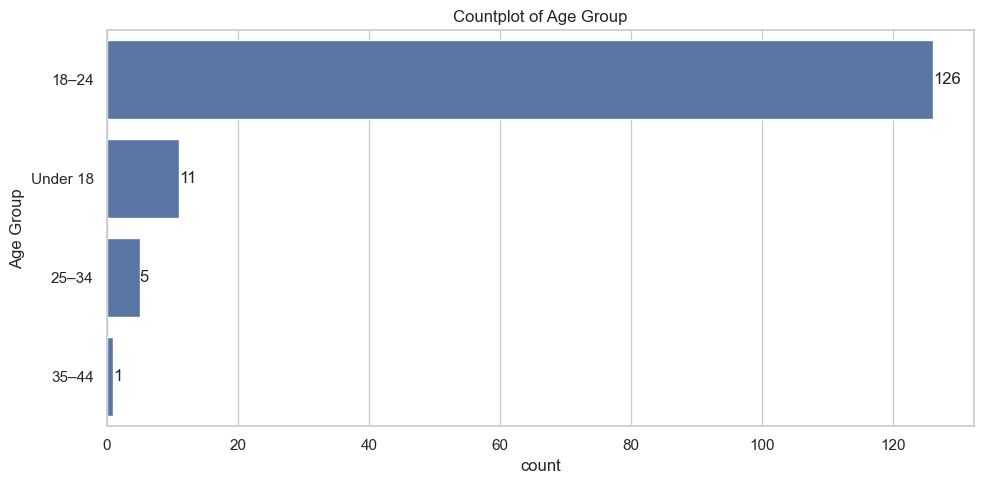

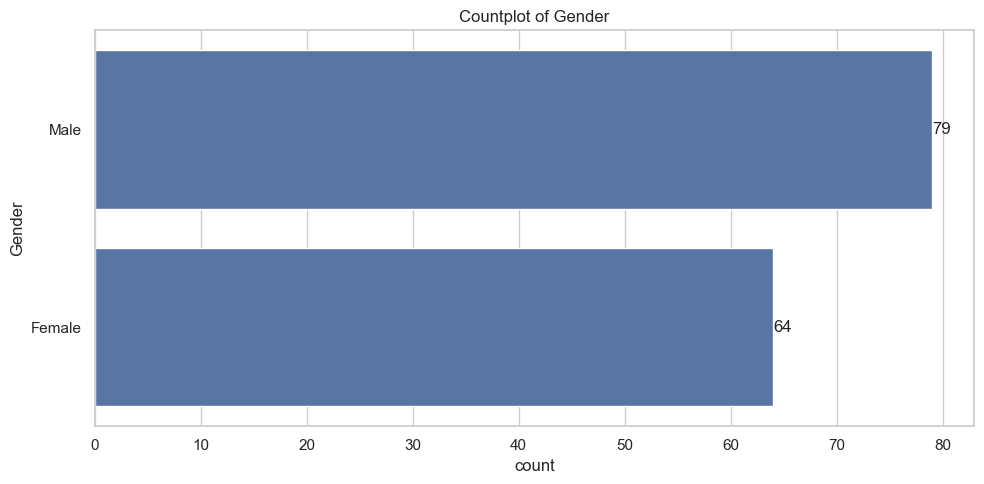

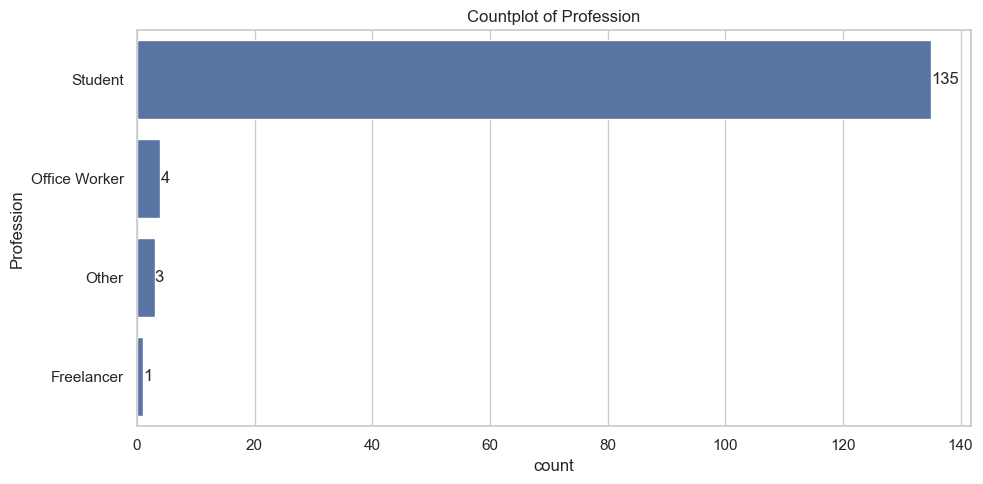

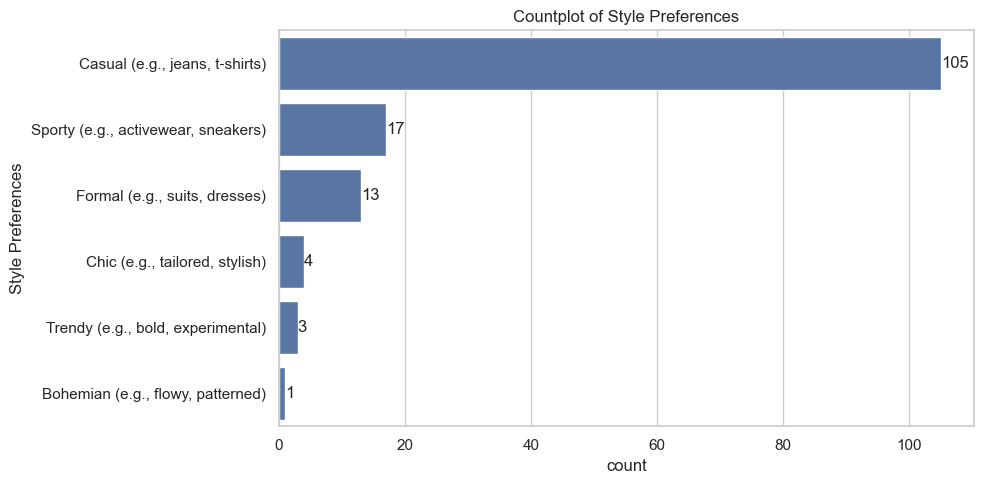

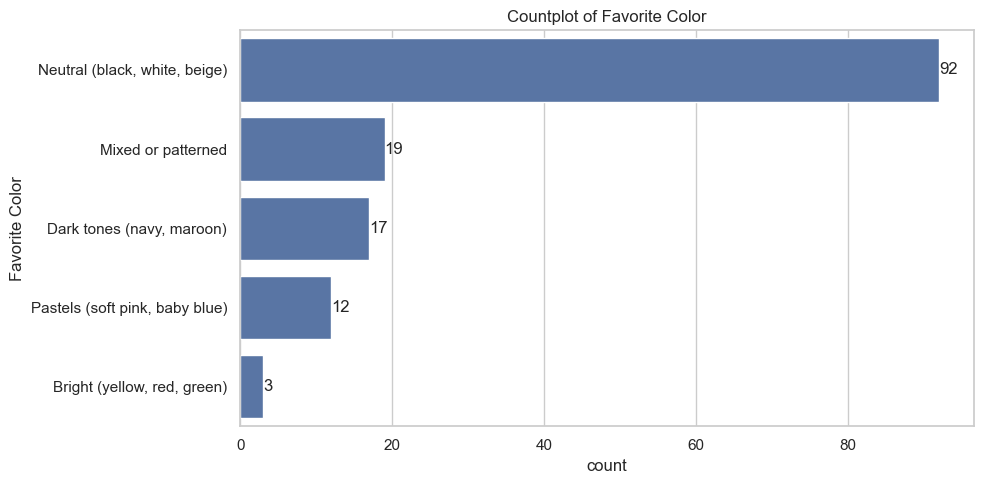

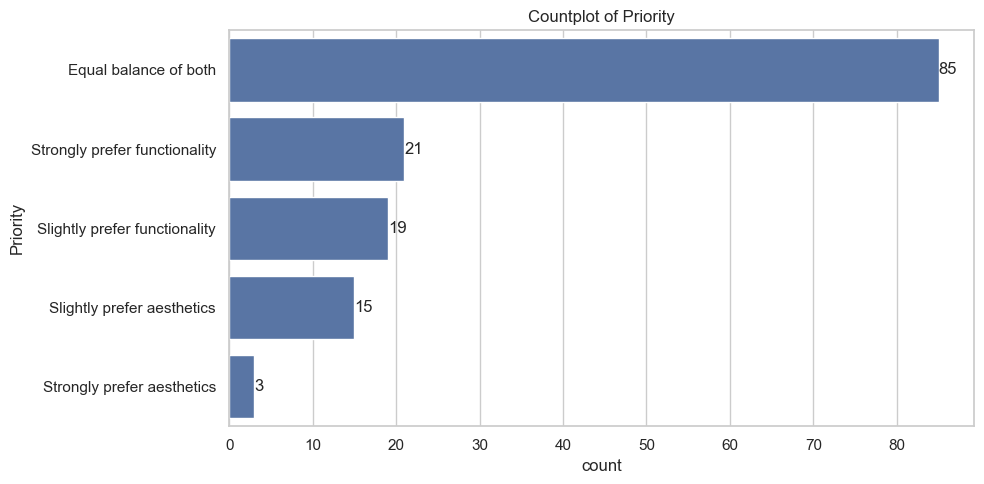

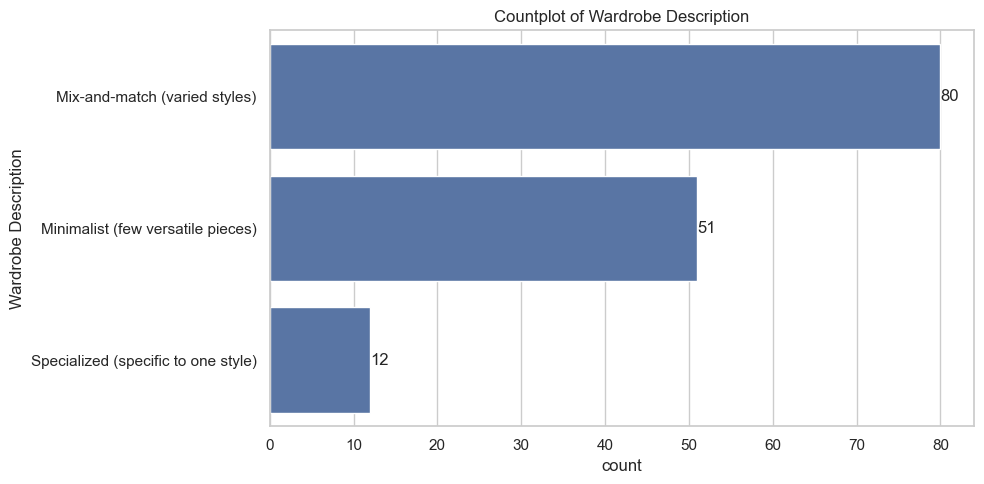

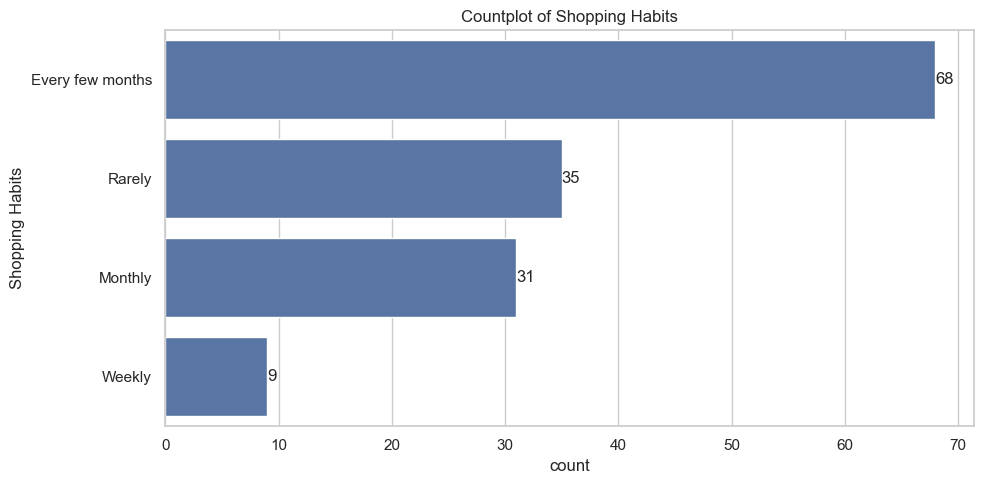

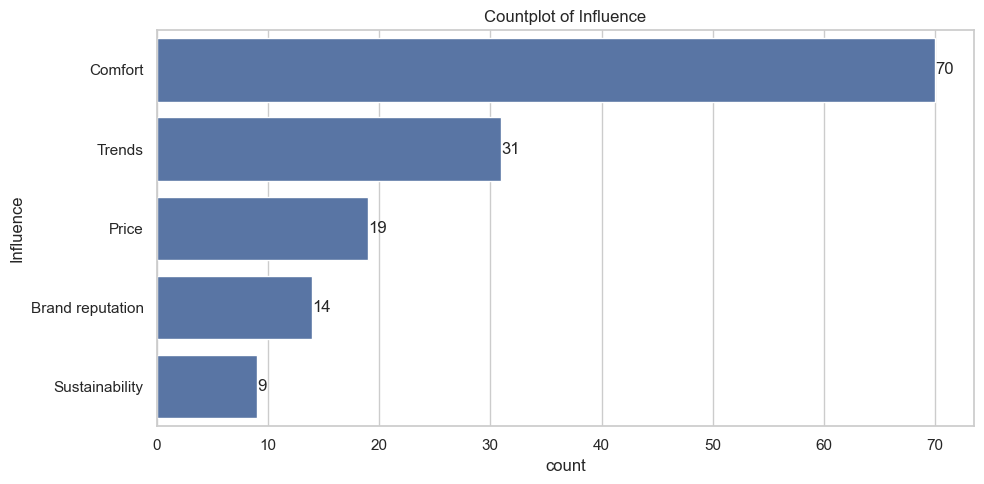

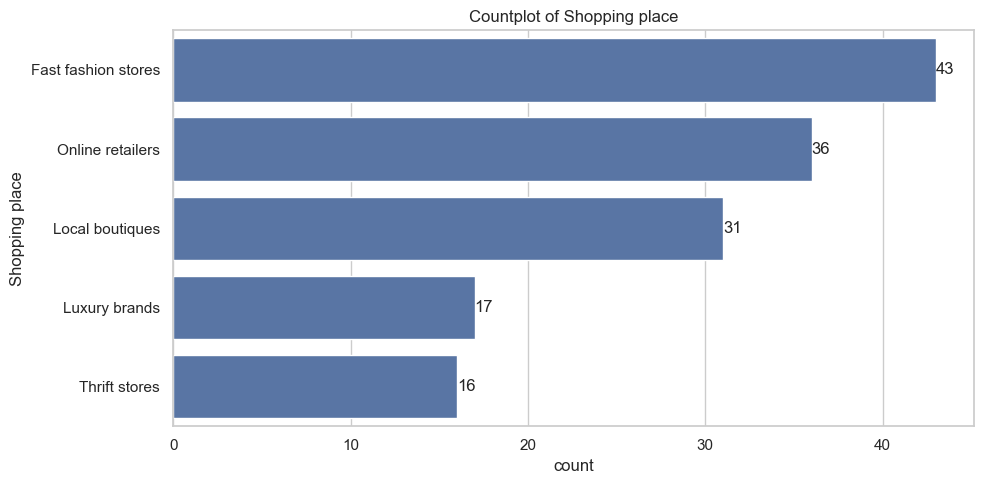

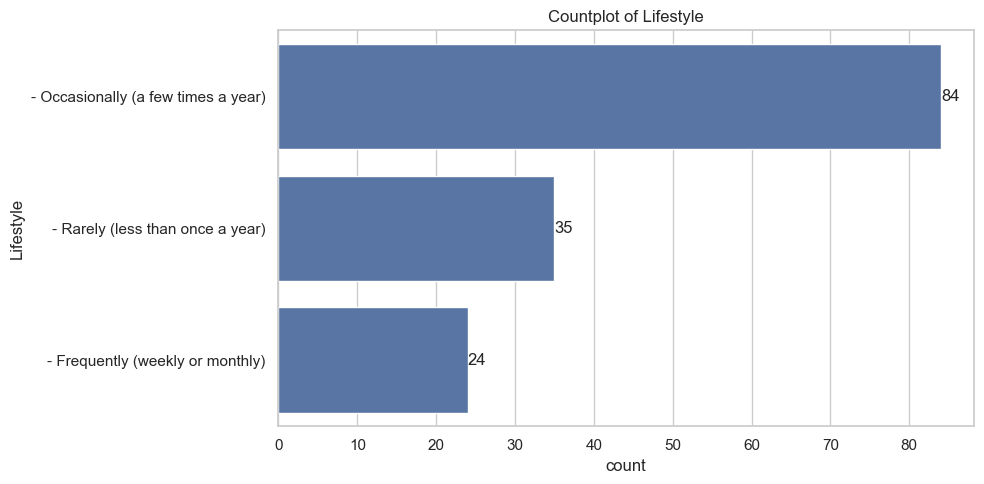

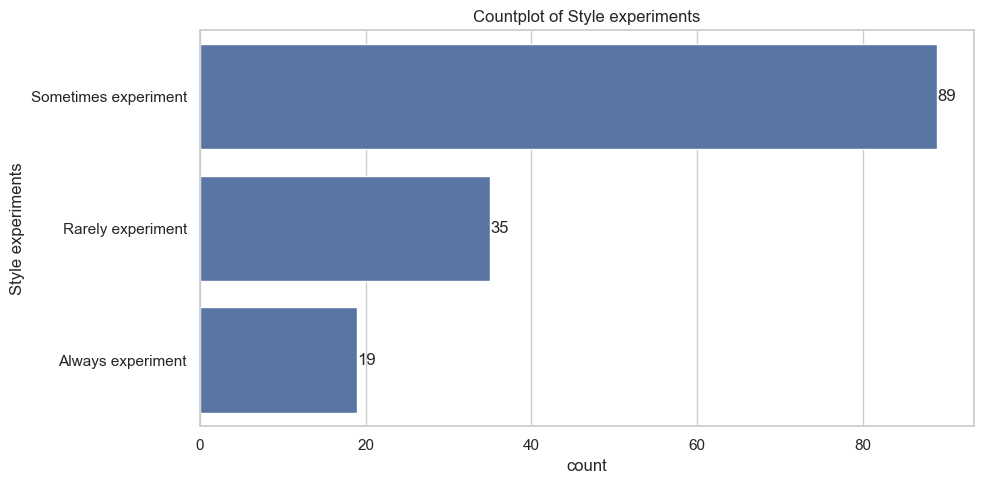

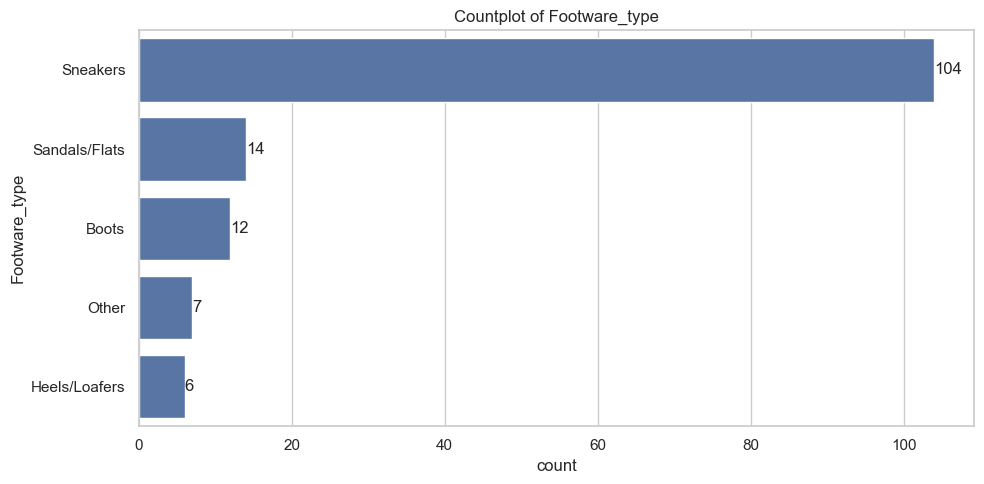

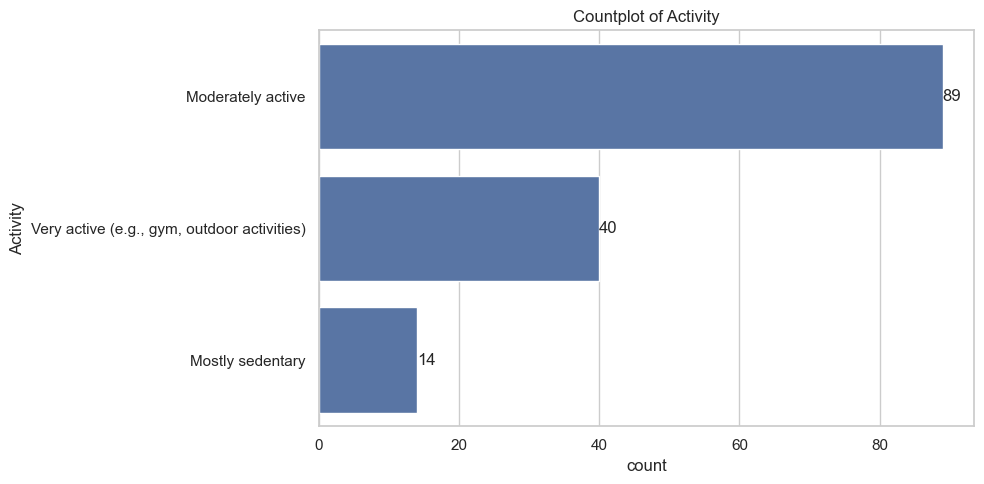

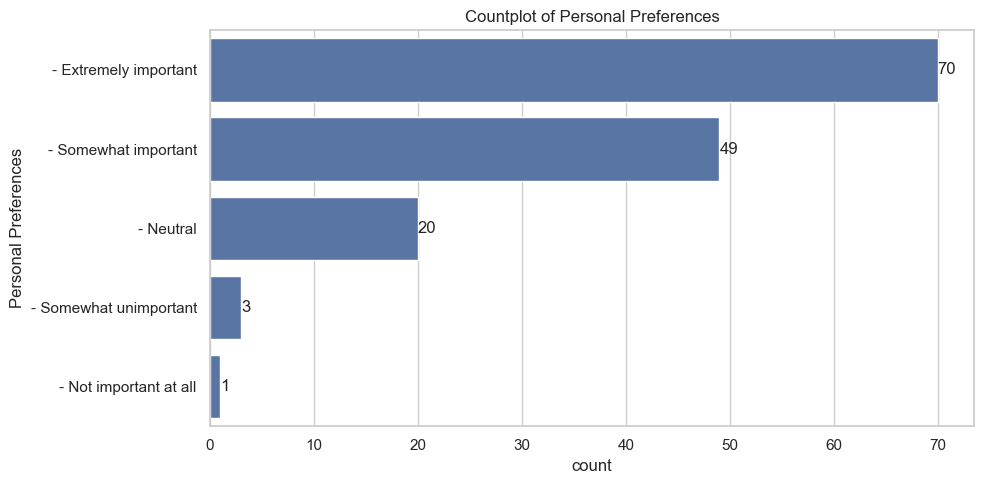

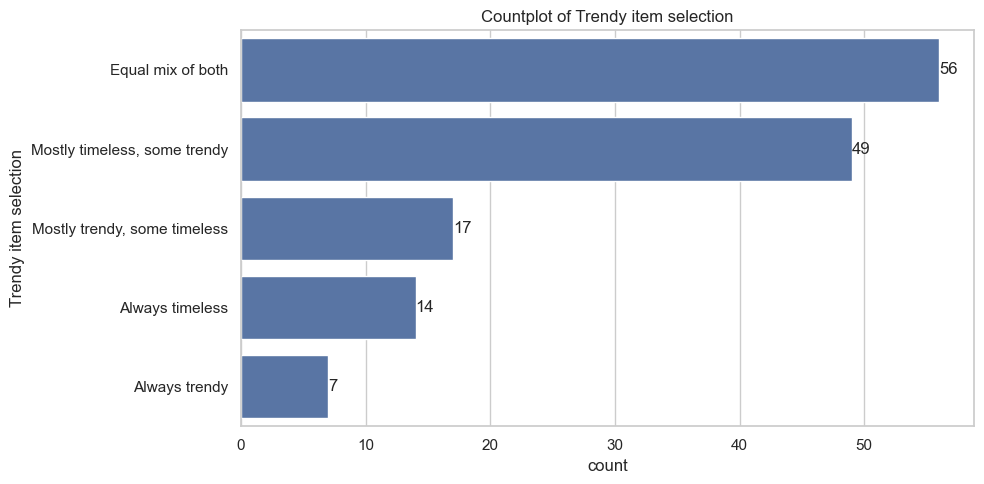

In [55]:
for col in categorical:
    plt.figure(figsize=(10,5))
    ax=sns.countplot(y=col,data=df,order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])   # Displays the value of the bars
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

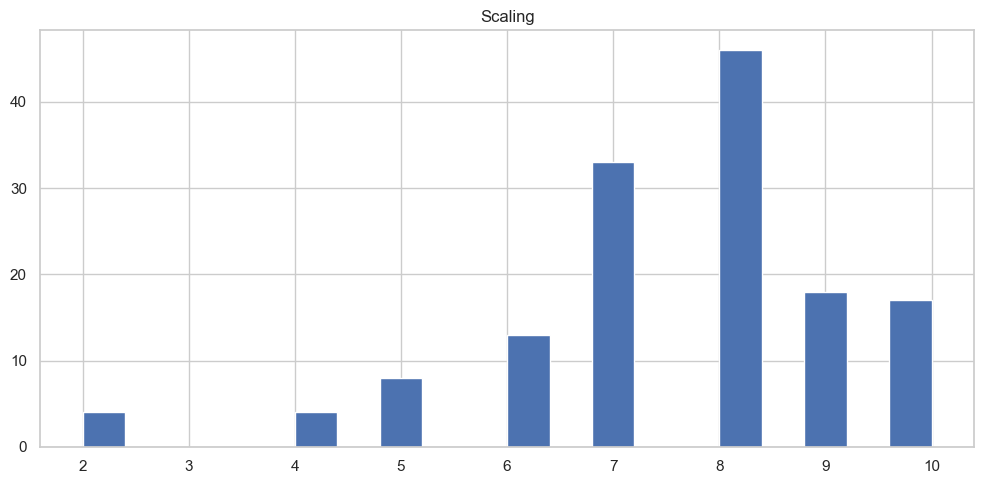

In [56]:
if numerical.shape[1]>0:
    numerical.hist(figsize=(10,5),bins=20)
    plt.tight_layout()
    plt.show()

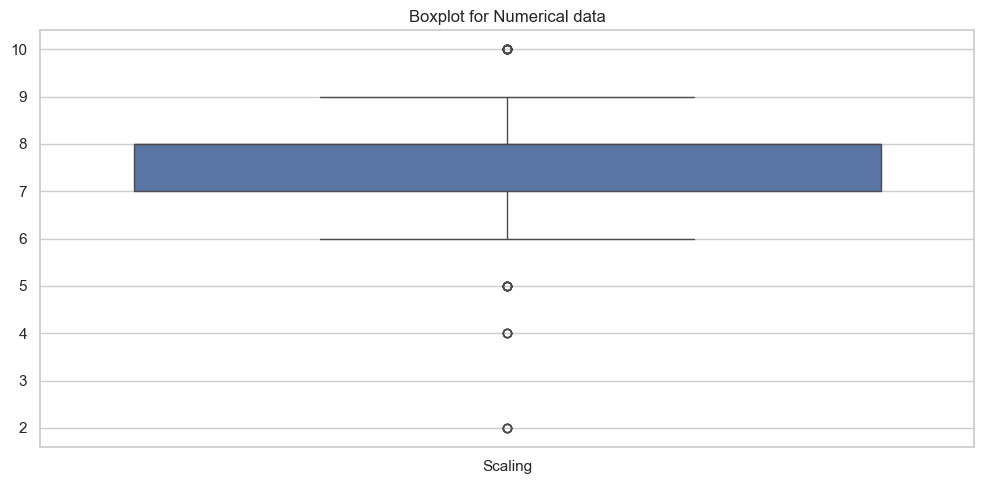

In [57]:
if numerical.shape[1]>0:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=numerical)
    plt.title("Boxplot for Numerical data")
    plt.tight_layout()
    plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              143 non-null    datetime64[ns]
 1   Age Group              143 non-null    object        
 2   Gender                 143 non-null    object        
 3   Profession             143 non-null    object        
 4   Style Preferences      143 non-null    object        
 5   Favorite Color         143 non-null    object        
 6   Priority               143 non-null    object        
 7   Wardrobe Description   143 non-null    object        
 8   Shopping Habits        143 non-null    object        
 9   Influence              143 non-null    object        
 10  Shopping place         143 non-null    object        
 11  Lifestyle              143 non-null    object        
 12  Style experiments      143 non-null    object        
 13  Footware_t

In [60]:
target_column='Scaling'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the DataFrame")

In [61]:
predicting_columns=['Age Group','Gender','Profession']
for col in predicting_columns:
    if col not in df.columns:
        raise ValueError(f"Predicting column '{col}' not found in the DataFrame")

In [62]:
df_model=df[predicting_columns+[target_column]]

In [63]:
df_model.head()

,Age Group,Gender,Profession,Scaling
0,18–24,Female,Student,8.0
1,18–24,Female,Student,6.0
2,18–24,Female,Student,9.0
3,18–24,Male,Student,6.0
4,18–24,Male,Student,6.0


In [64]:
df_model=pd.get_dummies(df_model,drop_first=True)

In [65]:
df_model.head()

,Scaling,Age Group_25–34,Age Group_35–44,Age Group_Under 18,Gender_Male,Profession_Office Worker,Profession_Other,Profession_Student
0,8.0,False,False,False,False,False,False,True
1,6.0,False,False,False,False,False,False,True
2,9.0,False,False,False,False,False,False,True
3,6.0,False,False,False,True,False,False,True
4,6.0,False,False,False,True,False,False,True


In [66]:
for col in df_model.columns:
    if df_model[col].dtype==bool:
        df_model[col]=df_model[col].map({True:1,False:0})

In [67]:
df_model.head()

,Scaling,Age Group_25–34,Age Group_35–44,Age Group_Under 18,Gender_Male,Profession_Office Worker,Profession_Other,Profession_Student
0,8.0,0,0,0,0,0,0,1
1,6.0,0,0,0,0,0,0,1
2,9.0,0,0,0,0,0,0,1
3,6.0,0,0,0,1,0,0,1
4,6.0,0,0,0,1,0,0,1


In [68]:
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred=clf.predict(x_test)

In [72]:
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

Accuracy Score: 0.3793103448275862


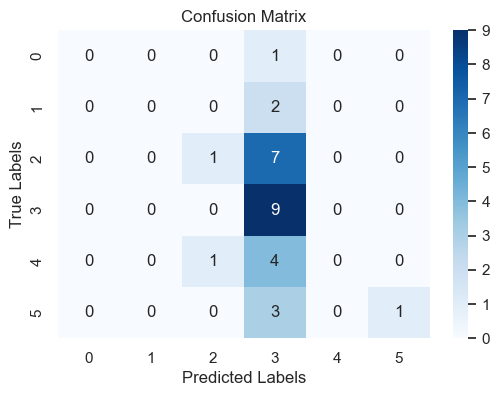

In [73]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

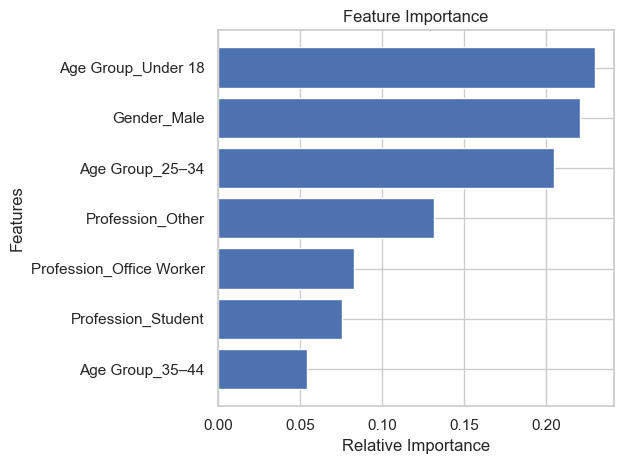

In [74]:
importances=clf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Accuracy Score: 0.27586206896551724


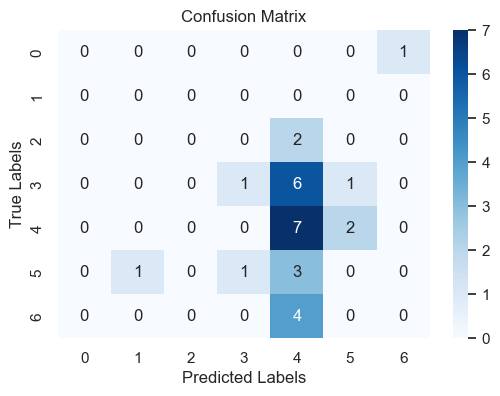

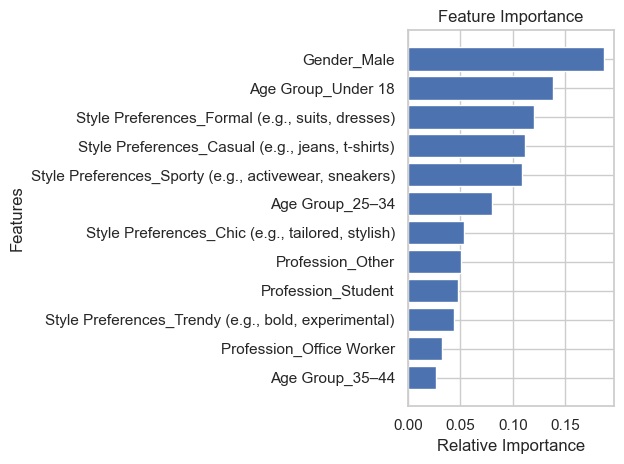

In [76]:
predicting_columns=['Age Group','Gender','Profession','Style Preferences']
df_model=df[predicting_columns+[target_column]]
df_model=pd.get_dummies(df_model,drop_first=True)
for col in df_model.columns:
    if df_model[col].dtype==bool:
        df_model[col]=df_model[col].map({True:1,False:0})
        
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

acc=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances=clf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [77]:
df['Favorite Color'].unique()

array(['Pastels (soft pink, baby blue)', 'Dark tones (navy, maroon)',
       'Neutral (black, white, beige)', 'Mixed or patterned',
       'Bright (yellow, red, green)'], dtype=object)

Accuracy Score: 0.3448275862068966


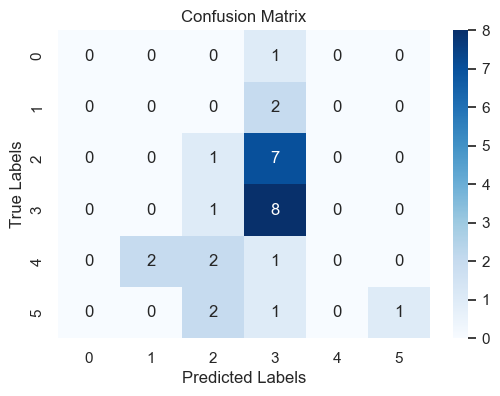

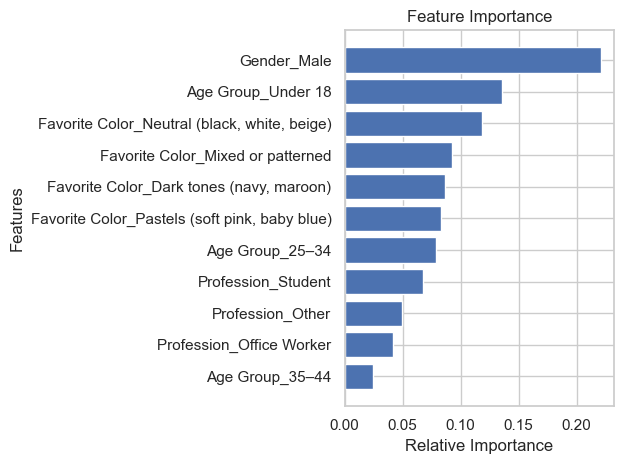

In [78]:
predicting_columns=['Age Group','Gender','Profession','Favorite Color']
df_model=df[predicting_columns+[target_column]]
df_model=pd.get_dummies(df_model,drop_first=True)
for col in df_model.columns:
    if df_model[col].dtype==bool:
        df_model[col]=df_model[col].map({True:1,False:0})
        
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

acc=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances=clf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Accuracy Score: 0.2413793103448276


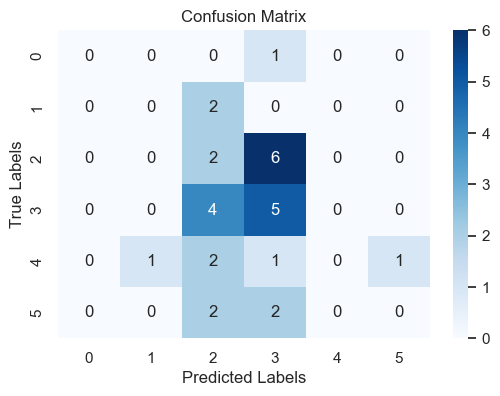

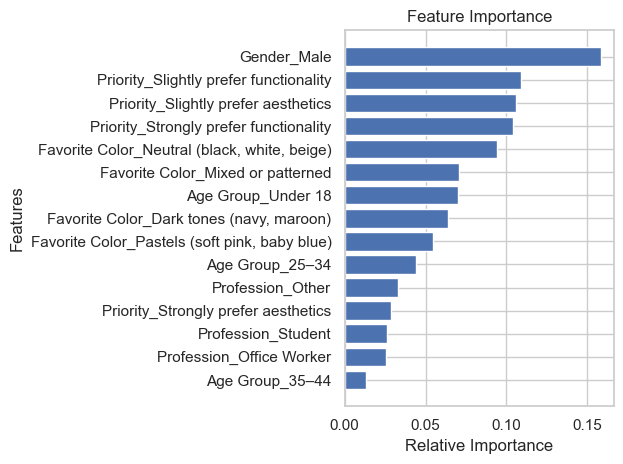

In [79]:
predicting_columns=['Age Group','Gender','Profession','Favorite Color','Priority']
df_model=df[predicting_columns+[target_column]]
df_model=pd.get_dummies(df_model,drop_first=True)
for col in df_model.columns:
    if df_model[col].dtype==bool:
        df_model[col]=df_model[col].map({True:1,False:0})
        
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

acc=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc}')

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances=clf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()